<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#import-the-necessary-libraries-to-work-with" data-toc-modified-id="import-the-necessary-libraries-to-work-with-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import the necessary libraries to work with</a></span></li><li><span><a href="#Loading-and-parsing-our-dataset" data-toc-modified-id="Loading-and-parsing-our-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and parsing our dataset</a></span><ul class="toc-item"><li><span><a href="#Replace-the-numerical-values-with-categorical-values" data-toc-modified-id="Replace-the-numerical-values-with-categorical-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Replace the numerical values with categorical values</a></span></li></ul></li><li><span><a href="#Univariate-(one-variable)" data-toc-modified-id="Univariate-(one-variable)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Univariate (one variable)</a></span><ul class="toc-item"><li><span><a href="#Quantitative-variables" data-toc-modified-id="Quantitative-variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Quantitative variables</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualization</a></span></li></ul></li></ul></div>

## import the necessary libraries to work with 
- pandas to work with data frames 
- numpy for mathematical computations 
- seaborn and matplotlib for visualizations 
- random for random generated values

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import random 

## Loading and parsing our dataset
This dataset is for rentals in New York City for house hunters. 

In [2]:
rentals = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv")

In [3]:
rentals.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [4]:
rentals.columns

Index(['rental_id', 'building_id', 'rent', 'bedrooms', 'bathrooms',
       'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee',
       'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator',
       'has_dishwasher', 'has_patio', 'has_gym', 'neighborhood', 'submarket',
       'borough'],
      dtype='object')

In [5]:
rentals.shape

(5000, 20)

In [6]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         5000 non-null   int64  
 1   building_id       5000 non-null   int64  
 2   rent              5000 non-null   int64  
 3   bedrooms          5000 non-null   float64
 4   bathrooms         5000 non-null   int64  
 5   size_sqft         5000 non-null   int64  
 6   min_to_subway     5000 non-null   int64  
 7   floor             5000 non-null   float64
 8   building_age_yrs  5000 non-null   int64  
 9   no_fee            5000 non-null   int64  
 10  has_roofdeck      5000 non-null   int64  
 11  has_washer_dryer  5000 non-null   int64  
 12  has_doorman       5000 non-null   int64  
 13  has_elevator      5000 non-null   int64  
 14  has_dishwasher    5000 non-null   int64  
 15  has_patio         5000 non-null   int64  
 16  has_gym           5000 non-null   int64  


In [7]:
rentals.describe(include="all")

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,15,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upper West Side,All Downtown,Manhattan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,579,1229,3539
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800,NaN,NaN,NaN
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922,NaN,NaN,NaN
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


### Replace the numerical values with categorical values 

As you can see, there are so many columns with numerical values that should be categorical. 

In [8]:
rentals.no_fee.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_roofdeck.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_washer_dryer.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_doorman.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_elevator.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_dishwasher.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_patio.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_gym.replace({1:'yes', 0:'no'}, inplace=True)

## Univariate (one variable) 
- Let's look at one variable at a time. Imagine you are looking for an apartment in New York city and you'd like to understand the typical rent ranges. 

### Quantitative variables 
**The mean**

In [9]:
# the average rent for apartments in New York 

np.mean(rentals.rent)

4536.9208

In [10]:
# alternatively, you can do it as: 

rentals.rent.mean()

4536.9208

In [11]:
import scipy.stats

scipy.stats.trim_mean (rentals.rent, .1)

3980.253

**The median**

In [12]:
rent_median = np.median(rentals.rent)
rent_median

3600.0

**The mode**

In [13]:
import statistics 

rent_mode = statistics.mode(rentals.rent)
rent_mode

3500

### Visualization 

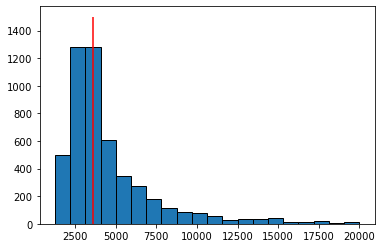

In [14]:
plt.hist(rentals.rent,bins =20, edgecolor="black")
plt.vlines(x = rent_median, ymin = 0, ymax = 1500, colors = "red", label="median")
plt.show()

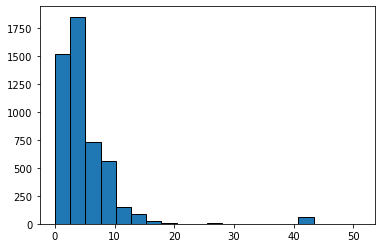

In [15]:
plt.hist(rentals.min_to_subway, bins = 20, edgecolor = "black")
plt.show()

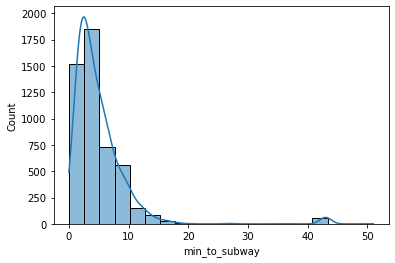

In [16]:
sns.histplot(rentals.min_to_subway, bins = 20, edgecolor = "black", kde = True)
plt.show()

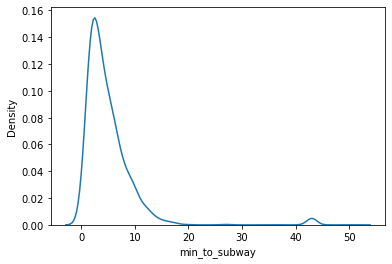

In [17]:
sns.kdeplot(rentals.min_to_subway)
plt.show()

In [18]:
np.min(rentals.rent)

1250

In [19]:
np.max(rentals.rent)

20000

In [20]:
np.std(rentals.rent)

2929.545954602412

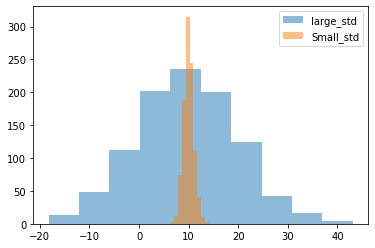

In [21]:
small_std = np.random.normal(loc=10, scale=1, size=1000)
large_std = np.random.normal(loc=10, scale=10,size=1000)

plt.hist(large_std, alpha =0.5, label="large_std")
plt.hist(small_std, alpha =0.5, label="Small_std")
plt.legend()
plt.show()

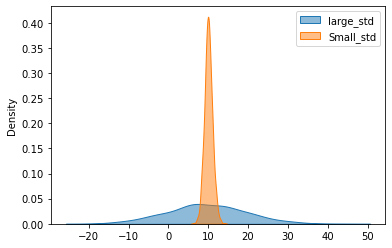

In [22]:
sns.kdeplot(large_std, alpha =0.5, label="large_std", fill=True)
sns.kdeplot(small_std, alpha =0.5, label="Small_std", fill=True)
plt.legend()
plt.show()

**Categorical data**

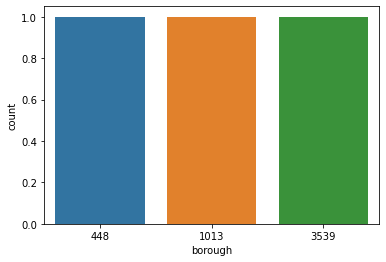

In [23]:
sns.countplot(x = rentals.borough.value_counts())
plt.show()

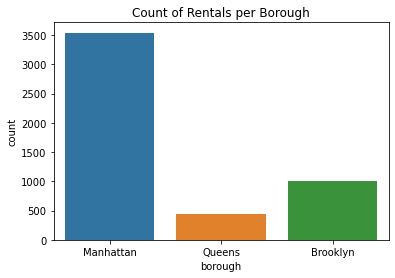

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(x=rentals.borough)
plt.title ("Count of Rentals per Borough")  # ✅ Adds a title
plt.show();


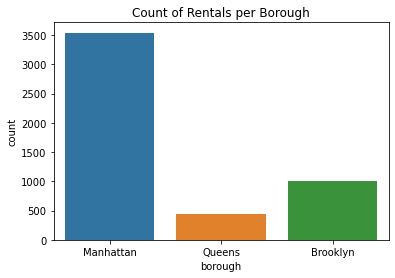

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=rentals.borough)
plt.title("Count of Rentals per Borough")  # ✅ Adds a title
plt.show()


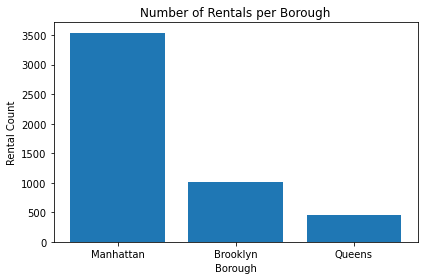

In [35]:
import matplotlib.pyplot as plt

# Count the number of rentals per borough
borough_counts = rentals['borough'].value_counts()

# Plot
plt.bar(x=borough_counts.index, height=borough_counts.values)

plt.title("Number of Rentals per Borough")
plt.xlabel("Borough")
plt.ylabel("Rental Count")
plt.tight_layout()
plt.show()



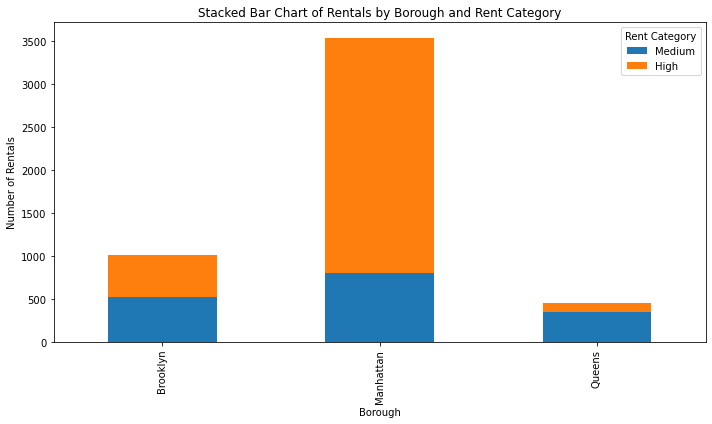

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create rent categories (e.g., low, medium, high)
rentals['rent_category'] = pd.cut(rentals.rent, bins=[0, 1000, 3000, rentals.rent.max()],
                                  labels=['Low', 'Medium', 'High'])

# 2. Create a cross-tab (counts of rent categories per borough)
stacked_data = pd.crosstab(rentals.borough, rentals.rent_category)

# 3. Plot stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title("Stacked Bar Chart of Rentals by Borough and Rent Category")
plt.xlabel("Borough")
plt.ylabel("Number of Rentals")
plt.legend(title="Rent Category")
plt.tight_layout()
plt.show()
